In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from IPython.display import Latex,display, Markdown
import math

# 1. Feladat

In [2]:
# adatok beolvasása
energiaTábla = pd.read_excel('hf_energia.xlsx',sheet_name='Leiro',usecols='A:C')
energiaMérleg_összesitve = energiaTábla.pivot_table(values='Mennyiség', 
                                 index=['Forrás'],
                                 columns=['Felhasználás'], 
                                 aggfunc=np.sum,
                                 margins=True,
                                 margins_name='Összesen').fillna('')

# eredeti tábla megjelenítése
print(energiaMérleg_összesitve)

Felhasználás      Főzés     Fűtés Hűtés Készülékek Melegvíz  Összesen
Forrás                                                               
Földgáz            8110  103919.0                     12391    124420
Kőolajtermékek     2293     400.0                       445      3138
Megújulók                 67054.0                      1386     68440
Szén                       5930.0                                5930
Távhő                     15990.0                      4888     20878
Villamos energia   1477    1515.0   313      24809    12381     40495
Összesen          11880  194808.0   313      24809    31491    263301


## Milyen az energiafogyasztás szerkezete felhasználási módok és források szerint?

In [3]:
energiaMérleg = energiaTábla.pivot_table(values='Mennyiség', 
                                 index=['Forrás'],
                                 columns=['Felhasználás'], 
                                 aggfunc='sum').fillna(0)
print(energiaMérleg)

Felhasználás       Főzés     Fűtés  Hűtés  Készülékek  Melegvíz
Forrás                                                         
Földgáz           8110.0  103919.0    0.0         0.0   12391.0
Kőolajtermékek    2293.0     400.0    0.0         0.0     445.0
Megújulók            0.0   67054.0    0.0         0.0    1386.0
Szén                 0.0    5930.0    0.0         0.0       0.0
Távhő                0.0   15990.0    0.0         0.0    4888.0
Villamos energia  1477.0    1515.0  313.0     24809.0   12381.0


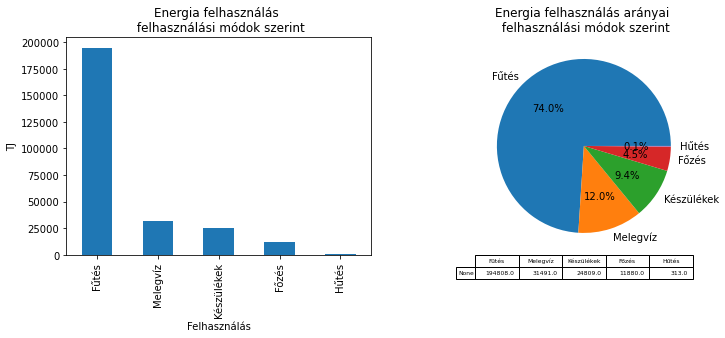

In [56]:
összesen_mod = energiaMérleg.sum().sort_values(ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
összesen_mod.plot(  
    kind = 'bar', 
    stacked = False, 
    title = 'Energia felhasználás \n felhasználási módok szerint', 
    mark_right = True,
    ylabel='TJ',
    ax = axs[0])

összesen_mod.plot(  
    kind = 'pie', 
    title = 'Energia felhasználás arányai \n felhasználási módok szerint', 
    ylabel='',
    table=True,
    autopct='%1.1f%%',
    ax = axs[1])

plt.show()

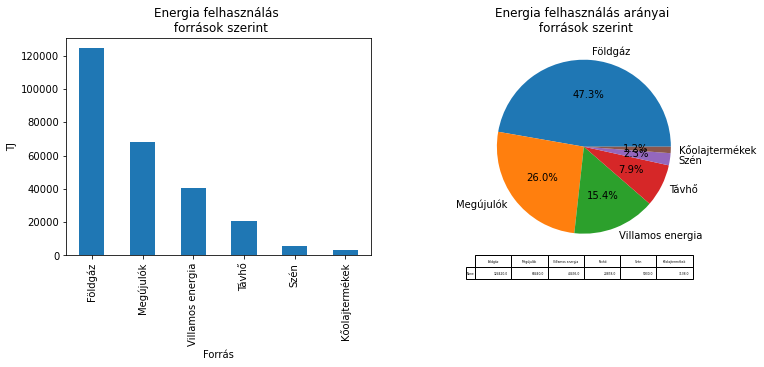

In [55]:
összesen_forras = energiaMérleg.sum(axis=1).sort_values(ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

összesen_forras.plot(  
    kind = 'bar', 
    stacked = False, 
    title = 'Energia felhasználás \n források szerint', 
    mark_right = True,
    ylabel='TJ',
    ax = axs[0])

összesen_forras.plot(  
    kind = 'pie', 
    title = 'Energia felhasználás arányai \n források szerint', 
    ylabel='',
    table=True,
    autopct='%1.1f%%',
    ax = axs[1])

plt.show()


In [94]:
pd.options.display.float_format = '{:.2%}'.format

# melyik energiahordozó mire van használva
szerkezet_forras = energiaMérleg.div(energiaMérleg.sum(axis=1), axis=0)
print('Szerkezet: források bontása felhasználási módonként (sorösszegek aránya)')
print(szerkezet_forras)

print('')
# használati módok milyen energiahordozóból vannak ellátva
szerkezet_mod = energiaMérleg.div(energiaMérleg.sum(axis=0), axis=1)
print('Szerkezet: felhasználási módok bontása energiaforrásonként (oszlopösszegek aránya)')
print(szerkezet_mod)

Szerkezet: források bontása felhasználási módonként (sorösszegek aránya)
Felhasználás      Főzés   Fűtés  Hűtés  Készülékek  Melegvíz
Forrás                                                      
Földgáz           6.52%  83.52%  0.00%       0.00%     9.96%
Kőolajtermékek   73.07%  12.75%  0.00%       0.00%    14.18%
Megújulók         0.00%  97.97%  0.00%       0.00%     2.03%
Szén              0.00% 100.00%  0.00%       0.00%     0.00%
Távhő             0.00%  76.59%  0.00%       0.00%    23.41%
Villamos energia  3.65%   3.74%  0.77%      61.26%    30.57%

Szerkezet: felhasználási bontások bontása energiaforrásonként (oszlopösszegek aránya)
Felhasználás      Főzés  Fűtés   Hűtés  Készülékek  Melegvíz
Forrás                                                      
Földgáz          68.27% 53.34%   0.00%       0.00%    39.35%
Kőolajtermékek   19.30%  0.21%   0.00%       0.00%     1.41%
Megújulók         0.00% 34.42%   0.00%       0.00%     4.40%
Szén              0.00%  3.04%   0.00%       0.

<ipython-input-129-81f1a143311c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(x_value)
<ipython-input-129-81f1a143311c>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_value)


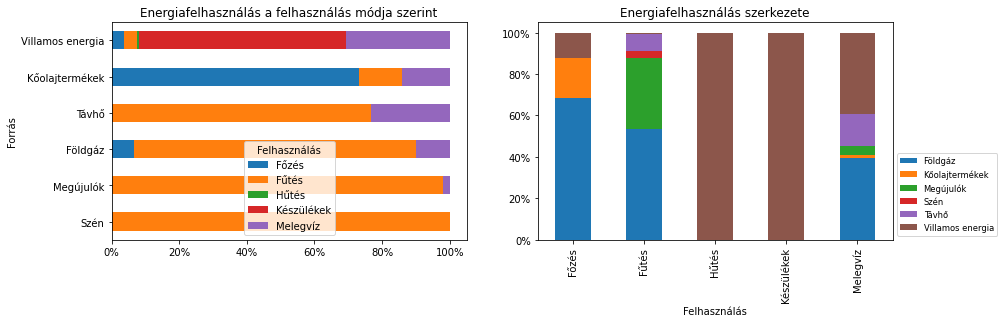

In [129]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

ax0 = szerkezet_forras.sort_values(['Fűtés'],ascending=False).plot(  
    kind = 'barh', 
    stacked = True, 
    title = 'Energiafelhasználás a felhasználás módja szerint',     
    mark_right = True,
    ax = axs[0]) 
x_value=['{:,.0%}'.format(x) for x in ax0.get_xticks()]
ax0.set_xticklabels(x_value)


ax1 = szerkezet_mod.T.plot(  
    kind = 'bar', 
    stacked = True, 
    title = 'Energiafelhasználás szerkezete',     
    mark_right = True,
    ax = axs[1]) 

y_value=['{:,.0%}'.format(x) for x in ax1.get_yticks()]
ax1.set_yticklabels(y_value)
ax1.legend( bbox_to_anchor=(1, 0),loc='lower left', fontsize='small')

plt.show()

## Hasonlítsa össze az egyes energiafajták relatív árát!

In [136]:
n = 9609.4 # Ezer fő lakott 2017-ben a magánháztartásokban

# egy főre jutó kiadások nagysága (Ft/fő/év)
dfKiadasok = pd.read_excel('hf_energia.xlsx',
                                sheet_name='Leiro', 
                                usecols='F:G', index_col=0)
pd.options.display.float_format = '{:.2f}'.format
print(dfKiadasok.dropna(axis=0))

                  egy főre jutó kiadások nagysága (Ft/fő/év)
Forrás.1                                                    
Villamos energia                                    44596.00
Távhő                                               12314.00
Földgáz                                             48969.00
Szén                                                 1560.00
Kőolajtermékek                                       3762.00
Megújulók                                           23094.00


In [137]:
# Relatív ár: ehhez szükség van egy táblára ami a kiadások nagysága, és az egyes energiafajták felhasználását mutatja
# ha a kiadás nagyságát elosztjuk a felhasználással, akkor 
df1 = energiaMérleg.sum(axis=1)
df2 = dfKiadasok.dropna(axis=0)
df2.index.rename('Forrás', inplace=True)

df3 = pd.concat([df1, df2], axis=1)
df3['RelativÁr']=df3[df3.columns[1]]/df3[df3.columns[0]]
df3['Relativ kiadás']=df3[df3.columns[1]]/df3[df3.columns[0]]*n
df3

,0,egy főre jutó kiadások nagysága (Ft/fő/év),RelativÁr,Relativ kiadás
Földgáz,124420.00,48969.00,0.39,3782.05
Kőolajtermékek,3138.00,3762.00,1.20,11520.26
Megújulók,68440.00,23094.00,0.34,3242.54
Szén,5930.00,1560.00,0.26,2527.94
Távhő,20878.00,12314.00,0.59,5667.70
Villamos energia,40495.00,44596.00,1.10,10582.56


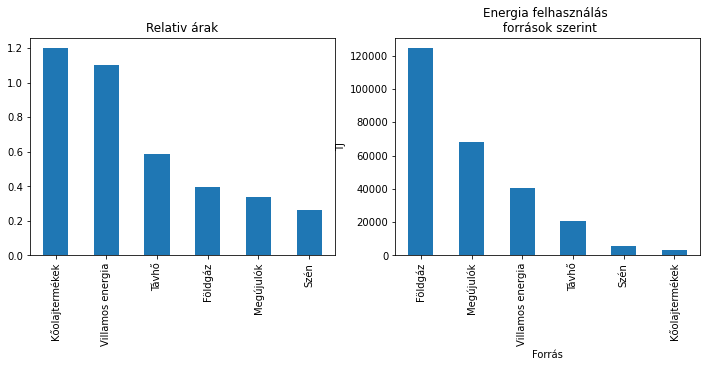

In [149]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

chart=df3['RelativÁr'].sort_values(ascending=False).plot(
    kind='bar',
    title = 'Relativ árak', 
    ax = axs[0])

összesen_forras.plot(  
    kind = 'bar', 
    sort_columns = True,
    title = 'Energia felhasználás \n források szerint', 
    ylabel='TJ',
    ax = axs[1])

plt.show()


Szöveges értékelés:
- A kőolajtermékek relativ árai a legmagasabbak, felhasználásuk a legalacsonyabb, ami a termék keresletének rugalmasságára utal.
- a villamos energia relativ ára és mennyisége arra utal hogy a felhasználási módok közül a világítás és elektromos berendezések terén rugalmatlan a kereslet, nincs  helyettesítő termék.

# 2. feladat

In [142]:
# adattábla beolvasása
dfKapcsolat = pd.read_excel('hf_energia.xlsx',
                                sheet_name='kapcsolat', 
                                usecols='A:H')
# a minőségi ismérveket átalakítom 'category' típusra
# így tudok rájuk a kódjuk alapján is hivatkozni ha kell 
dfKapcsolat['Társaság'] = dfKapcsolat['Társaság'].astype('category')
dfKapcsolat['Település'] = dfKapcsolat['Település'].astype('category')
dfKapcsolat['Elhelyezkedés'] = dfKapcsolat['Elhelyezkedés'].astype('category')
dfKapcsolat['Szolgáltatások Száma'] = dfKapcsolat['Szolgáltatások Száma'].astype('category')

dfKapcsolat.head()

,Társaság,Távolság,Település,Elhelyezkedés,Nyitva tartás,Szolgáltatások Száma,95-ös benzin,Gázolaj
0,Petrol,30.5,Ajka,belterület,16,1 és 3 között,346.80,387.2
1,Shell,29.9,Ajka,belterület,24,1 és 3 között,350.88,394.9
2,MOL,29.5,Ajka,belterület,18,4 és több,350.88,397.1
3,MOL,32.2,Ajka,főút mellett,24,1 és 3 között,353.94,397.1
4,OIL,43.7,Zirc,belterület,24,0,357.00,397.1


In [147]:
dfKapcsolat.Társaság.values

['Petrol', 'Shell', 'MOL', 'MOL', 'OIL', ..., 'MOL', 'MOL', 'MOL', 'MOL', 'MOL']
Length: 78
Categories (7, object): ['Avia', 'Lukoil', 'MOL', 'OIL', 'OMV', 'Petrol', 'Shell']

In [143]:
dfKapcsolat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Társaság              78 non-null     category
 1   Távolság              78 non-null     float64 
 2   Település             78 non-null     category
 3   Elhelyezkedés         78 non-null     category
 4   Nyitva tartás         78 non-null     int64   
 5   Szolgáltatások Száma  78 non-null     category
 6   95-ös benzin          78 non-null     float64 
 7   Gázolaj               78 non-null     float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 5.0 KB


A táblázatban 8 ismérvvel van megadva a statisztikai egységekre ami egy benzinkut.
- Társaság:      minőségi *
- Távolság:      mennyiségi
- Település:     területi *
- Elhelyezkedés: minőségi *
- Nyitva tartás  mennyiségi
- Szolgáltatások Száma : mennyiségi
- 95-ös benzin[ára]: mennyiségi
- Gázolaj [ára]: mennyiségi

In [123]:
print(dfKapcsolat.groupby(['Társaság'])['Gázolaj'].describe().round(2))

          count    mean    std    min     25%     50%     75%    max
Társaság                                                            
Avia        4.0  405.08   2.75  403.7  403.70  403.70  405.08  409.2
Lukoil      7.0  405.11   7.06  399.3  400.40  401.50  407.55  419.1
MOL        40.0  413.66  16.71  397.1  403.70  408.65  412.50  458.7
OIL         2.0  406.45  13.22  397.1  401.78  406.45  411.12  415.8
OMV         8.0  405.90   6.11  399.3  402.60  403.70  408.10  419.1
Petrol      4.0  396.28   6.31  387.2  394.63  398.20  399.85  401.5
Shell      13.0  410.64  16.73  394.9  400.40  405.90  410.30  445.5


In [127]:
print(dfKapcsolat.groupby(['Társaság','Elhelyezkedés'])['Gázolaj'].mean().unstack().round(2))

Elhelyezkedés  belterület  főút mellett  sztráda mellett
Társaság                                                
Avia               405.08           NaN              NaN
Lukoil             405.08        405.17              NaN
MOL                407.37        407.08            449.9
OIL                397.10        415.80              NaN
OMV                404.01        419.10              NaN
Petrol             392.15        400.40              NaN
Shell              404.80        399.30            445.5


In [130]:
d = dfKapcsolat.groupby(['Szolgáltatások Száma'])['Gázolaj'].describe().round(2)
print(d)

                      count    mean    std    min    25%    50%     75%    max
Szolgáltatások Száma                                                          
0                      11.0  406.00  13.66  397.1  399.3  400.4  407.55  445.5
1 és 3 között          41.0  410.89  16.49  387.2  402.6  405.9  411.40  458.7
4 és több              26.0  410.51  12.47  397.1  403.7  407.0  412.23  445.5


## Nevezzen meg asszociációs, vegyes és korrelációs kapcsolatokat!

### asszociációs:  ha mindkét ismérv minősítéses jellemző
Társaság - Település - Elhelyezkedés

1. társaság - Elhelyezkedés
2. társaság -település

Itt gyakorlatilag a fenti 4 változót összehasonlítom össze a benzinkutak adatai alapján


In [131]:
# TÁRSASÁG - ELHELYEZKEDÉS
# Kombinációs tábla előállítása
# Az összesítő sor (margins=True) a feltétel nélküli megoszlásokat mutatja
# a tábázat cellái pedig a kutak megoszlásának feltételes megoszlását mutatja
# összesen N=78 kutat vizsgálunk(elemszám)

print(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=True))

Elhelyezkedés  belterület  főút mellett  sztráda mellett  All
Társaság                                                     
Avia                    4             0                0    4
Lukoil                  4             3                0    7
MOL                    21            13                6   40
OIL                     1             1                0    2
OMV                     7             1                0    8
Petrol                  2             2                0    4
Shell                  10             1                2   13
All                    49            21                8   78


In [132]:
## Kontingencia táblák
# A benzinkutak %os megoszlása  társaság és elhelyezkedés szerinti csoportosításban
pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, normalize='columns').style.format("{:.2%}")

Elhelyezkedés,belterület,főút mellett,sztráda mellett
Társaság,,,
Avia,8.16%,0.00%,0.00%
Lukoil,8.16%,14.29%,0.00%
MOL,42.86%,61.90%,75.00%
OIL,2.04%,4.76%,0.00%
OMV,14.29%,4.76%,0.00%
Petrol,4.08%,9.52%,0.00%
Shell,20.41%,4.76%,25.00%


In [133]:
# A benzinkutak Elhelyezkedés szerinti %-os megoszlása a benzinkút társaság szerinti csoportosításban
pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, normalize='index').style.format('{:.2%}')

Elhelyezkedés,belterület,főút mellett,sztráda mellett
Társaság,,,
Avia,100.00%,0.00%,0.00%
Lukoil,57.14%,42.86%,0.00%
MOL,52.50%,32.50%,15.00%
OIL,50.00%,50.00%,0.00%
OMV,87.50%,12.50%,0.00%
Petrol,50.00%,50.00%,0.00%
Shell,76.92%,7.69%,15.38%


In [134]:
ct = pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=True)
print(ct)
print('\n')
print('feltételezett gyakoriságok táblázata:')
print(pd.DataFrame(chi2_contingency(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=False))[3]))

Elhelyezkedés  belterület  főút mellett  sztráda mellett  All
Társaság                                                     
Avia                    4             0                0    4
Lukoil                  4             3                0    7
MOL                    21            13                6   40
OIL                     1             1                0    2
OMV                     7             1                0    8
Petrol                  2             2                0    4
Shell                  10             1                2   13
All                    49            21                8   78


feltételezett gyakoriságok táblázata:
           0          1         2
0   2.512821   1.076923  0.410256
1   4.397436   1.884615  0.717949
2  25.128205  10.769231  4.102564
3   1.256410   0.538462  0.205128
4   5.025641   2.153846  0.820513
5   2.512821   1.076923  0.410256
6   8.166667   3.500000  1.333333


In [135]:

chi2, p, dof, ex = chi2_contingency(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=False))
Latex(f'$\\chi^2$:{chi2:.3f}, p:{p}, dof:{dof}')

<IPython.core.display.Latex object>

In [86]:
import math
C = math.sqrt(chi2/(2*78))
print(f'Cramer-mutató: {C:.4f}')

Cramer-mutató: 0.2831


A Cramer mutató függvényszerű kapcsolatnál 1, függetlenség esetén pedig 0. Most tehát akét ismérv kapcsolata nem függvényszerű és nem is független, hanem sztochaszikus. Az érték 0.2831 a kapcsolat gyenge.

In [88]:
# először átalakítom, hogy csak a minőségi ismervek legyenek a táblában
data = dfKapcsolat[[i for i in dfKapcsolat.columns if i in ('Társaság','Elhelyezkedés','Település')]].copy()
data.head()

,Társaság,Település,Elhelyezkedés
0,Petrol,Ajka,belterület
1,Shell,Ajka,belterület
2,MOL,Ajka,belterület
3,MOL,Ajka,főút mellett
4,OIL,Zirc,belterület


In [89]:
# aztán átalakítom
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns:
    data_encoded[i]=label.fit_transform(data[i])
data_encoded.head()

,Társaság,Település,Elhelyezkedés
0,5,0,0
1,6,0,0
2,2,0,0
3,2,0,1
4,3,35,0


               Társaság  Település  Elhelyezkedés
Társaság           1.00       0.49           0.08
Település          0.49       1.00           0.63
Elhelyezkedés      0.08       0.63           1.00




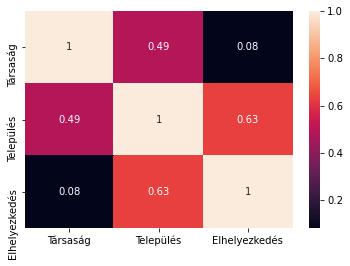

In [90]:
def cramers_V(var1,var2) :
    # Cross table building
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
    
    # Keeping of the test statistic of the Chi2 test
    stat = chi2_contingency(crosstab)[0] 
    
    # Number of observations
    obs = np.sum(crosstab) 
    
    # Take the minimum value between the columns and the rows of the cross table
    mini = min(crosstab.shape)-1 
    return (stat/(obs*mini))

# Mátrix összeállítása
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        # Cramer's V test
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) 
        # Keeping of the rounded value of the Cramer's V  
        col.append(round(cramers,2)) 
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

print(df)
print('\n')

# végül heatmap-on megjelenítés
sns.heatmap(df, annot=True)
plt.show()

In [200]:
print(pd.crosstab( dfKapcsolat['Település'],dfKapcsolat.Társaság, margins=False).head())

Társaság          Avia  Lukoil  MOL  OIL  OMV  Petrol  Shell
Település                                                   
Ajka                 0       0    2    0    0       1      1
Badacsony            0       0    1    0    0       0      0
Balatonakarattya     0       1    1    0    0       0      0
Balatonalmádi        1       0    1    0    0       0      0
Balatonboglár        0       0    0    0    0       0      1


In [151]:
# vegyes kapcsolat

# A táblázatban levő összes adat mennyiséget jelent, csak a  
# Szolgáltatások száma szerint lehet szórást, átlagot, egyéb mutatókat számolni
vk = pd.crosstab( dfKapcsolat['Szolgáltatások Száma'],dfKapcsolat.Elhelyezkedés, margins=False)
print(vk)

Elhelyezkedés         belterület  főút mellett  sztráda mellett
Szolgáltatások Száma                                           
0                              6             4                1
1 és 3 között                 26            10                5
4 és több                     17             7                2


In [157]:
# Korreláció : 2 mennyiségi ismérv közti kapcsolat, 
# int és float típusú oszlopok közül lehet választani
dfKapcsolat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Társaság              78 non-null     category
 1   Távolság              78 non-null     float64 
 2   Település             78 non-null     category
 3   Elhelyezkedés         78 non-null     category
 4   Nyitva tartás         78 non-null     int64   
 5   Szolgáltatások Száma  78 non-null     category
 6   95-ös benzin          78 non-null     float64 
 7   Gázolaj               78 non-null     float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 5.0 KB


In [175]:
dfKapcsolat[['Távolság', 'Gázolaj', 'Nyitva tartás', '95-ös benzin']].describe()

,Távolság,Gázolaj,Nyitva tartás,95-ös benzin
count,78.000000,78.000000,78.000000,78.000000
mean,29.958974,410.074359,19.525641,369.776154
std,10.658786,14.790339,4.356587,15.041918
min,9.700000,387.200000,12.000000,346.800000
25%,23.750000,401.500000,16.000000,362.100000
50%,28.800000,405.900000,18.000000,365.670000
75%,38.350000,411.125000,24.000000,370.260000
max,48.800000,458.700000,24.000000,414.120000


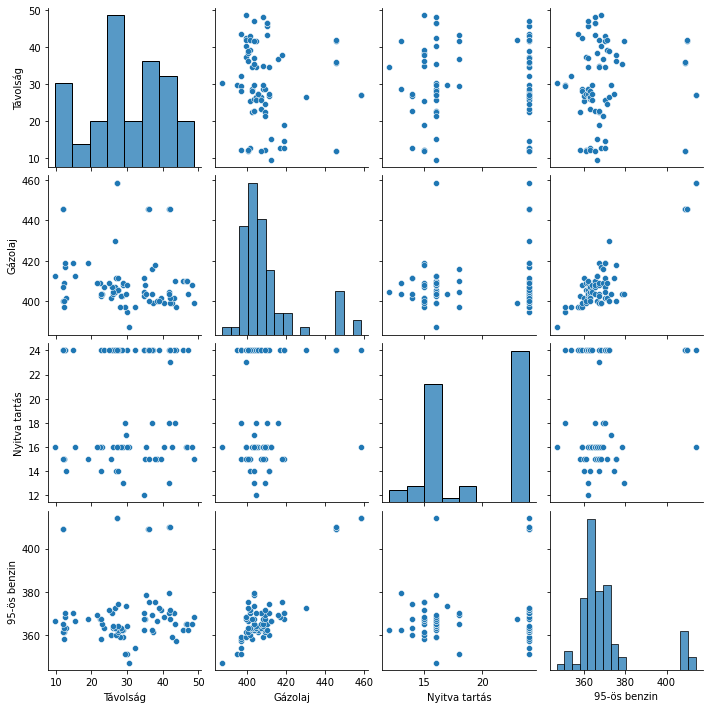

In [178]:
sns.pairplot(dfKapcsolat[['Távolság', 'Gázolaj', 'Nyitva tartás', '95-ös benzin']])


               Távolság   Gázolaj  Nyitva tartás  95-ös benzin
Távolság       1.000000 -0.121624      -0.012311       0.02771
Gázolaj       -0.121624  1.000000       0.213816       0.90729
Nyitva tartás -0.012311  0.213816       1.000000       0.19900
95-ös benzin   0.027710  0.907290       0.199000       1.00000


<AxesSubplot:>

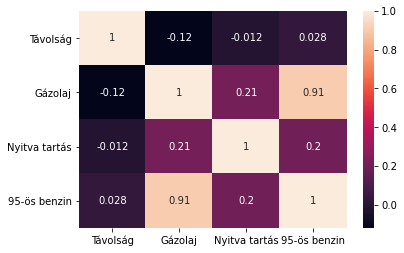

In [180]:
correlation_matrix = dfKapcsolat[['Távolság', 'Gázolaj', 'Nyitva tartás', '95-ös benzin']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)

# Na eddig volt könnyű.. most mindezt meg is kellene magyarázni...


# 3. feladat - Index

In [2]:
# a) elemezze a folyamatokat a kétféle indexkör összefüggésével
# b) Jellemezze a két év alatti gazdaságpolitikai célkitűzéseket szövegesen is.

In [11]:
# adatforrás beolvasása, átalakítása, 
data = pd.read_excel('hf_energia.xlsx', sheet_name='Index', usecols='A:D').dropna()
data['Tarifa'] = data['Tarifa'] .astype('category')
data['Év'] = data['Év'].astype('int64')
data['Ár'] = data['Ár'].astype('int64')
data['Fogyasztás'] = data['Fogyasztás'].astype('int64')
data

,Tarifa,Év,Ár,Fogyasztás
0,Lakosság,1989,5,10
1,Kisvállalat,1989,8,5
2,Nagyvállalat,1989,10,20
3,Lakosság,1991,15,8
4,Kisvállalat,1991,12,5
5,Nagyvállalat,1991,11,21


In [12]:
print(data.groupby(['Tarifa', 'Év']).sum().unstack())

               Ár      Fogyasztás     
Év           1989 1991       1989 1991
Tarifa                                
Kisvállalat     8   12          5    5
Lakosság        5   15         10    8
Nagyvállalat   10   11         20   21


In [13]:
d = data.groupby(['Tarifa', 'Év']).sum().unstack()

In [40]:
df = pd.DataFrame(data=d.values, columns=['p0','p1','q0','q1'], index = d.index)

In [42]:
df['q0p0'] = df.q0*df.p0  # bázis forgalom
df['q1p1'] = df.q1*df.p1  # tárgy forgalom
df['q1p0'] = df.q1*df.p0  # forgalom bázis áron 
df['q0p1'] = df.q0*df.p1  # forgalom bázis mennyiségen

#Forgalom %-os megoszlása
df['q0p0%'] = df.q0p0 / df.q0p0.sum()
df['q1p1%'] = df.q1p1 / df.q1p1.sum()

# egyedi ár, volumen és értékindex
df['ip'] = df.p1/df.p0
df['iq'] = df.q1/df.q0
df['iv'] = (df.q1*df.p1)/(df.q0*df.p0)

df

,p0,p1,q0,q1,q0p0,q1p1,q1p0,q0p1,q0p0%,q1p1%,ip,iq,iv
Tarifa,,,,,,,,,,,,,
Kisvállalat,8,12,5,5,40,60,40,60,0.137931,0.145985,1.5,1.00,1.500
Lakosság,5,15,10,8,50,120,40,150,0.172414,0.291971,3.0,0.80,2.400
Nagyvállalat,10,11,20,21,200,231,210,220,0.689655,0.562044,1.1,1.05,1.155


In [68]:
# Indexek kiszámolása

# Aggregált indexek
Iv = df.q1p1.sum()/df.q0p0.sum()

Iq_L = df.q1p0.sum()/df.q0p0.sum()
Iq_P = df.q1p1.sum()/df.q0p1.sum()
Iq_F = math.sqrt(Iq_P * Iq_L)  

Ip_L = df.q0p1.sum()/df.q0p0.sum() # Laypeyres bazis suly
Ip_P = df.q1p1.sum()/df.q1p0.sum() # Paasche tárgy suly
Ip_F = math.sqrt(Ip_P * Ip_L)      # Fisher

# Eltérés
wp = 

print(f'''
Iv:     {Iv  :10.3%}
Iq (0): {Iq_L:10.3%} 
Iq (1): {Iq_P:10.3%}
Iq (F): {Iq_F:10.3%}
Ip (0): {Ip_L:10.3%} 
Ip (1): {Ip_P:10.3%}
Ip (F): {Ip_F:10.3%}''')
# frame = pd.DataFrame(columns=['basis', 'targy'],  
#                      index=['basis', 'targy'], 
#                      data=[[df.q0p0.sum(),df.q0p1.sum()],[df.q1p0.sum(),df.q1p1.sum()]])
# frame['delta'] = frame.targy/frame.basis
# frame.append


Iv:       141.724%
Iq (0):   100.000% 
Iq (1):    95.581%
Iq (F):    97.766%
Ip (0):   148.276% 
Ip (1):   141.724%
Ip (F):   144.963%


,basis,targy,delta
basis,290,430,1.482759
targy,290,411,1.417241


a) elemezze a folyamatokat a kétféle indexkör összefüggésével
-------------------------------------------------------------------
Standardizálás: az átlagár változására ható tényezők kimutatása, ezáltal 
- az árak átlagos változását és 
- az összetétel változását 
számszerűsítjük.
I = I' x I''

Indexszámítás: az értékváltozást bontjuk fel az 
- árak átlagos változásának és a 
- mennyiség átlagos változásának 
hatására.
Iv = Ip x Iq

In [70]:
# Részhatás index
I1  = df.q1p1.sum()/df.q1p0.sum()

# Volumenindex
Isq = df.q1.sum()/df.q0.sum()


In [167]:
# naturáliában
Isumq = df.q1.sum()/df.q0.sum()
I_ketvesszo = 

display(Markdown(
   rf"""
Értékindex: $I_v=${Iv:.3f} 

Átlagár index: $I_p^1=${Ip1:.3f}

Árkalapindex:  $\bar I_\bar p=${Ipkalap:.3f}

Mennyiségindex: $ I_\sum q = {Isumq:.3f}$

"""))


Értékindex: $I_v=$1.417 

Árindex: $I_p^1=$1.417

Árkalapindex:  $\bar I_\bar p=$1.459

Mennyiségindex: $ I_\sum q = 0.971$

